# 1. Предсказание цены на недвижимость

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

In [2]:
import numpy as np

### Данные

в sklearn есть модуль, содержащий набор классических датасетов, воспользуемся им:

In [3]:
from sklearn.datasets import load_boston

In [4]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
X, y = load_boston(return_X_y = True)

In [6]:
X.shape

(506, 13)

In [7]:
y.shape

(506,)

In [8]:
load_boston().keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [9]:
data = load_boston()

In [10]:
import pandas as pd

In [11]:
x = pd.DataFrame(data['data'], columns = data['feature_names'])

In [12]:
y = data['target']

In [13]:
x.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
35,0.06417,0.0,5.96,0.0,0.4990,5.933,68.2,3.3603,5.0,279.0,19.2,396.90,9.68
476,4.87141,0.0,18.10,0.0,0.6140,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
277,0.06127,40.0,6.41,1.0,0.4470,6.826,27.6,4.8628,4.0,254.0,17.6,393.45,4.16
283,0.01501,90.0,1.21,1.0,0.4010,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16
206,0.22969,0.0,10.59,0.0,0.4890,6.326,52.5,4.3549,4.0,277.0,18.6,394.87,10.97
422,12.04820,0.0,18.10,0.0,0.6140,5.648,87.6,1.9512,24.0,666.0,20.2,291.55,14.10
229,0.44178,0.0,6.20,0.0,0.5040,6.552,21.4,3.3751,8.0,307.0,17.4,380.34,3.76
279,0.21038,20.0,3.33,0.0,0.4429,6.812,32.2,4.1007,5.0,216.0,14.9,396.90,4.85
103,0.21161,0.0,8.56,0.0,0.5200,6.137,87.4,2.7147,5.0,384.0,20.9,394.47,13.44
25,0.84054,0.0,8.14,0.0,0.5380,5.599,85.7,4.4546,4.0,307.0,21.0,303.42,16.51


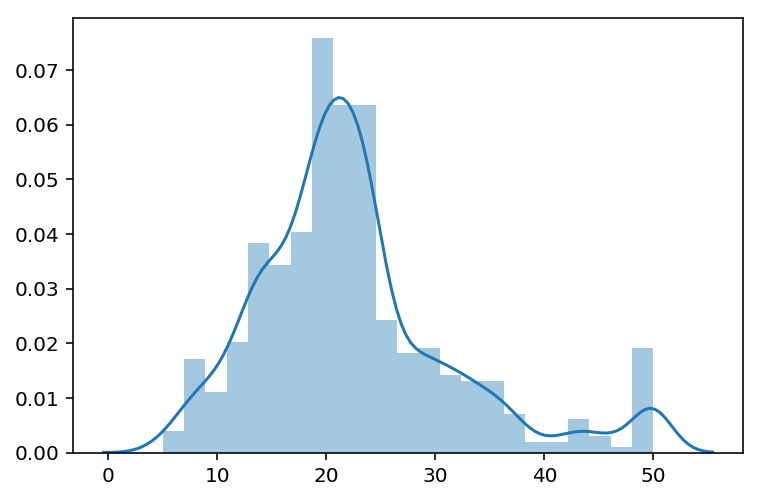

In [14]:
sns.distplot(y)

In [15]:
x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [16]:
x[:2]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [17]:
x[-2:]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


### Формирование выборок

разделим данные на 2 части, обучающую и тренировочную выборки:
1. фиксируем размер обучающей выборки
2. выделяем подмассивы данных из X, y

In [26]:
"""
make X_train, X_test, y_train, y_test
"""
train_share = 0.8
train_size = int(x.shape[0]*train_share)
X_train = x[:train_size]
X_test = x[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [27]:
X_train.shape

(404, 13)

In [28]:
X_test.shape

(102, 13)

### Построение регрессии и предсказания по тестовой выборке

In [22]:
"""
make y_pred
"""
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
y_pred = lr.predict(X_test)

### Оценка

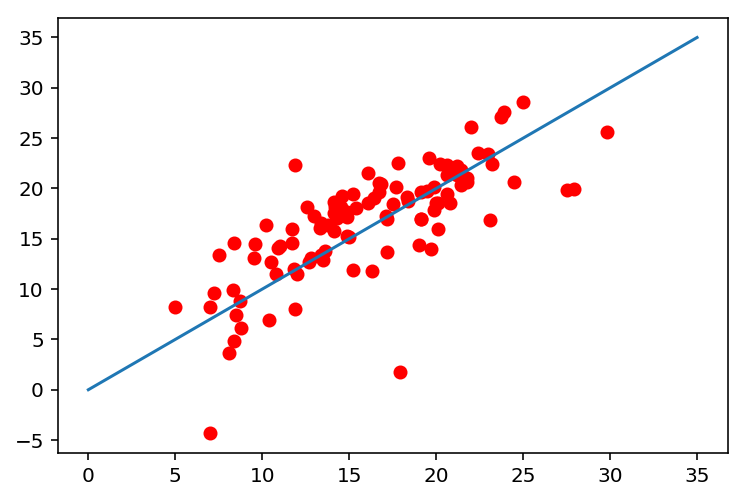

In [42]:
"""
make visual comparement 
"""

plt.plot(y_test, y_pred, "ro");
plt.plot([0,35], [0,35]);

### MSE

MSE - среднеквардратичная ошибка, т.е. среднее значение суммы квадратов ошибок

In [35]:
"""
count MSE
"""

MSE = np.mean((y_test - y_pred)**2)

In [36]:
MSE**0.5

3.852153018534121

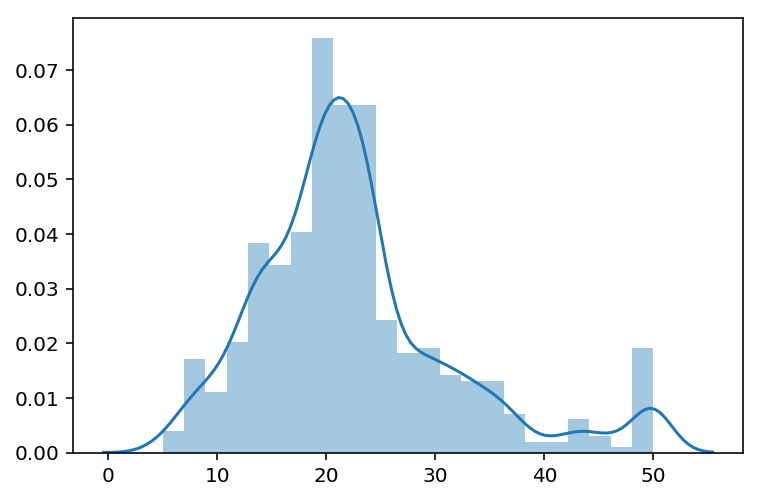

In [40]:
sns.distplot(y)

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

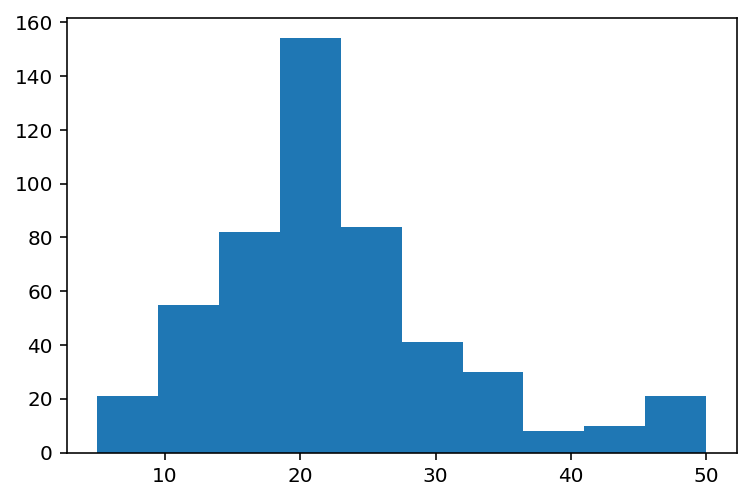

In [37]:
plt.hist(y)